# Gráficos relacionados a la evolución del radio en el tiempo empleando la propuesta de Bunkin

Links de interés a la hora de hacer gráficos:  
Letras griegas y Latex  
https://matplotlib.org/stable/tutorials/text/mathtext.html  
Colores  
https://matplotlib.org/stable/gallery/color/named_colors.html  
Legend's location  
https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot  

In [102]:
#Importo librerías
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
from scipy.optimize import fsolve #para resolver ecuaciones algebraicas
 
pi = math.pi

In [103]:
#Fuente
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

## Evolución desde $N_e = 1$ hasta $N_e = N_{e max}$

### Número de electrones en función del radio R_0 del bubston ?? Ver si es necesario esto cuando escriba el informe

### Densidad de electrones en función de r para valores de $N_e$ hasta $N_{e max}$

In [104]:
#Parámetros del problema

Delta = 6 #Energía mecánica para arrancar un electrón de la pared en [eV]
T_e_bubs_ini = Delta/3 #Temperatura de los electrones dentro de la burbuja en [eV]. Conversión: (ev)*()
T_e_bubs_ini = T_e_bubs_ini*(1.602176565e-19)*(1/1e-7) #en [erg] (CGS). Conversión (1ev)(1.602176565e-19J/1ev)*(1erg/1e-7 J)

q_e = -1.602176634e-19 #carga del electrón en [Coulomb]
q_e = q_e*(1/3.336641e-10) #en [Fr] (CGS). Conversión (C)*(Fr/3.336641e-10 C)

R0 = 1e-6 #Radio inicial de un bubston en [cm]. Este valor lo saqué del supuesto inicial del Bunkin



a_i = 2e-5 #radio de Debye de un electrolito dentro de un líquido en [cm]. Valor extraído del Bunkin
R1 = a_i #radio de los bubstons tal que comienzan a tocarse entre sí

In [105]:
#Defino funciones varias

def T_e(R):
    #Temperatura bajo el régimen de autoconsistencia
    return T_e_bubs_ini*R0/R

def N_emax(R):
    #Nro máximo de electrones
    return 64/9*(T_e(R)*R/q_e**2)**2
    
def x(R, Ne):
    #factor x = R/a_e. Resulta ser el mismo que el factor x del Bunkin. Recordar que por consideraciones cuasiestáticas lo que antes dependía de R0 ahora lo hace de R.
    def ec_de_x(x):
        #Esta ec está definida en el Bunkin
        return T_e(R)*R/q_e**2*(x*np.cosh(x)- np.sinh(x))/(x) - Ne
    return fsolve(ec_de_x, 4)[0]

def a_e(R, Ne):
    #Electron Debye Radius. a_e es solución de la ecuación de N_e asumiendo que N_e está dado por T_e, R0 y q_e al considerar x grande
    return R/x(R, Ne)

def n_e0(R, Ne):
    #Densidad en r = 0
    #R: radio de la burbuja
    return T_e(R)/(4*pi*q_e**2*a_e(R, Ne)**2)

def n_e(r, R, Ne):
    return n_e0(R, Ne)*np.sinh(r/a_e(R, Ne))/(r/a_e(R, Ne))

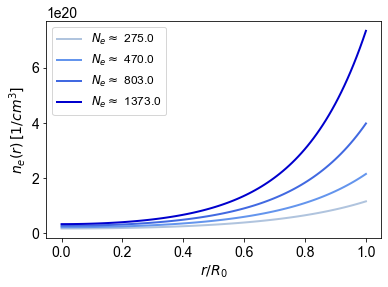

In [106]:
#Grafico la densidad en función de r para R = R0


#Arrays
r_array = R0*np.linspace(0.0001,1,100) #Si lo inicio desde 0 da error
Ne_array = np.geomspace(N_emax(R0)/5, N_emax(R0), num=4)
color_array = np.array(["lightsteelblue", "cornflowerblue", "royalblue", "mediumblue" ])

#Gráficos
for i in range(len(Ne_array)):
    Ne = Ne_array[i]
    n_e_array = n_e(r_array, R0, Ne)
    plt.plot(r_array/R0, n_e_array, label = r'$N_e \approx$ ' + str(np.around(Ne)), linewidth = 2, color = color_array[i]);

plt.legend(fontsize = 12)
# plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('$r/R_0$')
plt.ylabel('$n_e(r) \, [1/cm^3]$')

#Guardo el gráfico
plt.savefig('cap1_densidad_vs_r_vs_Ne.pdf', format='pdf',bbox_inches = "tight")


In [107]:
#Verifico que la integral de la densidad sea el nro de electrones
from scipy.integrate import quad
def integrando(r):
    return 4*pi*r**2*n_e(r, R0, Ne)
integral = quad(integrando, 0, R0)
print(integral[0])

1373.4553932506085


### Campo eléctrico en el interior de la burbuja

In [108]:
#Defino funciones

def E(r,R):
    #Campo eléctrico debido a la distribución de carga. No es la misma expresión que el Bunkin porque en el Bunkin están mal algunos factores
    ae = a_e(R, N_emax(R))
    x = r/ae
    return T_e(R)*ae/(q_e*r**2)*(np.sinh(x) - (x)*np.cosh(x))

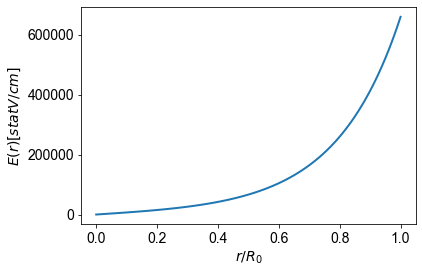

In [109]:
#Grafico

#Arrays
r_array = R0*np.linspace(0.0001,1,100) #Si lo inicio desde 0 da error
E_array = np.zeros(len(r_array))

for i in range(len(r_array)):
        E_array[i] = E(r_array[i],R0)

#Gráfico
plt.plot(r_array/R0, E_array, linewidth = 2);

# plt.legend(fontsize = 12)
# plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('$r/R_0$')
plt.ylabel('$E(r) [statV/cm]$')

#Guardo el gráfico
plt.savefig('cap1_campoE_vs_r.pdf', format='pdf',bbox_inches = "tight")

## Evolución desde $N_e = N_{e max}$ hasta $R = R_1$

### Presión eléctrica con el radio de la burbuja R hasta $R = R_1$
Mostrar dependencia $1/R^4$

In [110]:
#Defino funciones varias

def x(R):
    #factor x = R/a_e. Resulta ser el mismo que el factor x del Bunkin. Recordar que por consideraciones cuasiestáticas lo que antes dependía de R0 ahora lo hace de R.
    def ec_de_x(x):
        #Esta ec está definida en el Bunkin
        return T_e(R)*R/q_e**2*(x*np.cosh(x)- np.sinh(x))/(x) - N_emax(R)
    return fsolve(ec_de_x, 4)[0]

def a_e(R):
    #Electron Debye Radius. a_e es solución de la ecuación de N_e asumiendo que N_e está dado por T_e, R0 y q_e al considerar x grande
    return R/x(R)

def n_e0(R):
    #Densidad en r = 0
    #R: radio de la burbuja
    return T_e(R)/(4*pi*q_e**2*a_e(R)**2)

def N_emax(R):
    #Nro máximo de electrones
    return 64/9*(T_e(R)*R/q_e**2)**2

def n_e_R(R):
    #Densidad en r = R
    #R: radio de la burbuja
    return n_e0(R)*np.sinh(R/a_e(R))/(R/a_e(R))

def E(R):
    #Campo eléctrico debido a la distribución de carga. No es la misma expresión que el Bunkin porque en el Bunkin están mal algunos factores
    ae = a_e(R)
    x = R/ae
    return T_e(R)*ae/(q_e*R**2)*(np.sinh(x) - (x)*np.cosh(x))

def p_gas(R):
    #Presión producida por el gas de electrones
    return 2/3*n_e_R(R)*T_e(R)

def p_coul(R):
    #Presión electrostática producida por la distribución de carga (electrones)
    return E(R)**2/(8*pi)

def p_e(R):
    #Presión total producida por los electrones
    return p_gas(R) + p_coul(R)

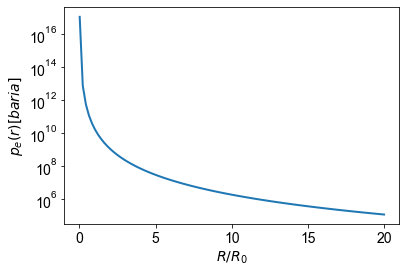

In [112]:
#Defino arrays
R_array = R1*np.linspace(0.001,1,100)
p_e_array = np.zeros(len(R_array))
for i in range(len(R_array)):
    p_e_array[i] = p_e(R_array[i])

#Grafico:
plt.plot(R_array/R0, p_e_array, linewidth = 2);

# plt.legend(fontsize = 12)
# plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('$R/R_0$')
plt.ylabel('$p_e(r) [baria]$')
plt.yscale("log")

#Guardo el gráfico
plt.savefig('cap1_p_e_vs_R.pdf', format='pdf',bbox_inches = "tight")

### Radio y velocidad en función del tiempo hasta $R = R_1$

In [ ]:
def dydt(t,y):
    #Sistema de ecuaciones de primer orden para la evolución del radio en función del tiempo. Entiéndase y = (R, Rp) = (R, v_R)
    v_R = y[1]
    R = y[0]

    #Expreso dydt_0 = dR/dt = v_R
    dydt_0 = v_R

    #Expreso dydt_2 = d(v_R/dt) = d2(R)/dt2
    dydt_1 = (p_e(R)/rho_L - 3/2*v_R**2)/R

    return [dydt_0, dydt_1]

#Defino la condición de stop de la evolución
def event_bubs(t, y):
    #Evoluciona hasta que R = R1 = l/2 \approx a_i
    return y[0] - a_i #Da cero cuando la condición ocurre


## Evolución desde formación del cluster instantánea hasta máxima expansión

###  Radio y velocidad en función del tiempo hasta el mínimo
Mencionar la condición $R_{cl} = R_{max}$